In [1]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
print("\n--- PART 1: LOADING DATA ---")
df_csv = pd.read_csv("../data/titanic.csv")
print("Loaded CSV Head:")
print(df_csv.head(5))


--- PART 1: LOADING DATA ---
Loaded CSV Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0

In [3]:
print("\n--- PART 2: PRE-PROCESSING ---")
# Create a copy to simulate dirty data
df_dirty = df_csv.copy()

# Inject errors
df_dirty.loc[0, 'Age'] = 200  # Outlier

# Fix Data
# 1. Fill Missing Age with Median
median_age = df_dirty['Age'].median()
df_dirty['Age'] = df_dirty['Age'].fillna(median_age)

# 2. Remove Outliers (Cap at 100)
df_clean = df_dirty[df_dirty['Age'] <= 100].copy()

print(f"Max Age after cleaning: {df_clean['Age'].max()}")


--- PART 2: PRE-PROCESSING ---
Max Age after cleaning: 80.0


Overall Survival Rate: 38.43%


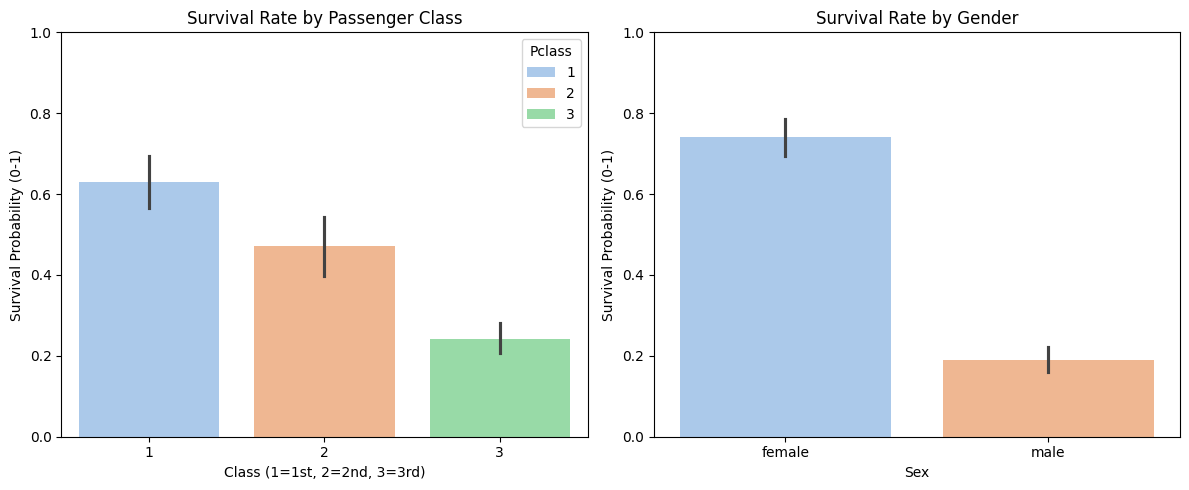

In [10]:
# Calculate Global Survival Rate
global_rate = df_clean['Survived'].mean() * 100
print(f"Overall Survival Rate: {global_rate:.2f}%")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Survival Rate by Class
# sns.barplot automatically calculates the Mean (Survival Rate) and confidence interval
sns.barplot(data=df_clean, x='Pclass', y='Survived', palette='pastel', hue='Pclass', ax=axes[0])
axes[0].set_title("Survival Rate by Passenger Class")
axes[0].set_ylabel("Survival Probability (0-1)")
axes[0].set_xlabel("Class (1=1st, 2=2nd, 3=3rd)")
axes[0].set_ylim(0, 1)

# Plot 2: Survival Rate by Gender
sns.barplot(data=df_clean, x='Sex', y='Survived', palette='pastel', hue='Sex', ax=axes[1])
axes[1].set_title("Survival Rate by Gender")
axes[1].set_ylabel("Survival Probability (0-1)")
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

Survival analysis saved to ../output/survival_rate_analysis.png


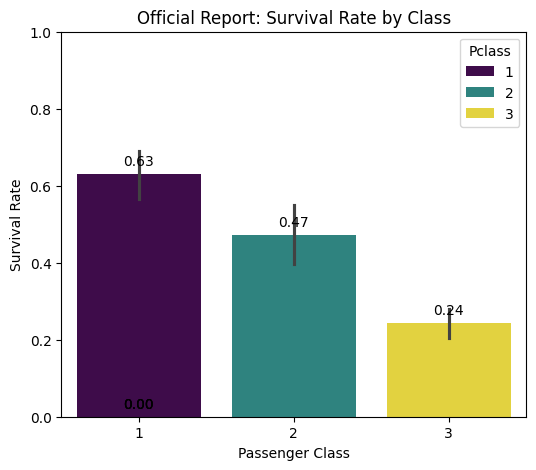

In [5]:
save_path = '../output/survival_rate_analysis.png'

plt.figure(figsize=(6,5))
# Re-drawing the specific plot for export
barplot = sns.barplot(data=df_clean, x='Pclass', y='Survived', hue='Pclass', palette='viridis')

# Add labels on top of bars for clarity
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.title("Official Report: Survival Rate by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)

plt.savefig(save_path, dpi=300)
print(f"Survival analysis saved to {save_path}")